## Rodrigo Xavier
## Matrícula 569037

## Hadamard, Kronecker and Khatri-Rao Products

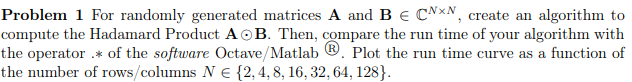

In [1]:
def hadamard_product(matrix_a, matrix_b):
    """
    Computes the Hadamard product (element-wise multiplication) of two matrices, matrix_a and matrix_b.

    Parameters:
    matrix_a (list of list of int/float): A 2D list (matrix) with dimensions (m x n).
    matrix_b (list of list of int/float): A 2D list (matrix) with dimensions (m x n).

    Returns:
    list of list of int/float: The resulting matrix from the Hadamard product of matrix_a and matrix_b with dimensions (m x n).

    Raises:
    ValueError: If the matrices have different dimensions.

    Example:
    matrix_a = [[1, 2], [3, 4]]
    matrix_b = [[5, 6], [7, 8]]
    result = hadamard_product(matrix_a, matrix_b)
    print(result)
    """
    
    # Check if matrices have the same dimensions
    if len(matrix_a) != len(matrix_b) or len(matrix_a[0]) != len(matrix_b[0]):
        raise ValueError("Matrices must have the same dimensions for Hadamard product.")
    
    # Get the dimensions of the matrices (m x n)
    rows_a, cols_a = len(matrix_a), len(matrix_a[0])

    # Initialize the result matrix with the same dimensions as input matrices
    result_matrix = [[None for _ in range(cols_a)] for _ in range(rows_a)]

    # Perform the element-wise multiplication (Hadamard product)
    for i in range(rows_a):
        for j in range(cols_a):
            result_matrix[i][j] = matrix_a[i][j] * matrix_b[i][j]
    
    return result_matrix

In [13]:
# N values to test different matrix sizes
N_values = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]
runtime_radamard_manual = []
runtime_radamard_numpy = []

for N in N_values:
    # Step 1: Create a random matrix with NumPy
    matrix_a = np.random.randint(1, 10, size=(N, N))
    matrix_b = np.random.randint(1, 10, size=(N, N))

    # Convert NumPy arrays to nested lists for the manual Hadamard product
    matrix_a_list = matrix_a.tolist()
    matrix_b_list = matrix_b.tolist()

    # Start the timer for manual Hadamard product
    start_time = time.time()

    # Compute the Hadamard product using the manual function
    C_manual = hadamard_product(matrix_a_list, matrix_b_list)

    # End the timer for manual Hadamard product
    end_time = time.time()
    runtime_manual = end_time - start_time
    runtime_radamard_manual.append(runtime_manual)

    # Start the timer for NumPy Hadamard product
    start_time = time.time()

    # Compute the Hadamard product using NumPy
    C_numpy = np.multiply(matrix_a, matrix_b)

    # End the timer for NumPy Hadamard product
    end_time = time.time()
    runtime_numpy = end_time - start_time
    runtime_radamard_numpy.append(runtime_numpy)

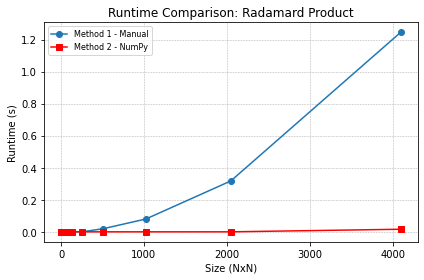

In [15]:
import matplotlib.pyplot as plt

# Plotting the runtimes
plt.plot(N_values, runtime_radamard_manual, label="Method 1 - Manual", marker="o")
plt.plot(N_values, runtime_radamard_numpy, label="Method 2 - NumPy", marker="s", color='red')

# Adding labels and legend
plt.xlabel("Size (NxN)", fontsize=10)
plt.ylabel("Runtime (s)", fontsize=10)
plt.title("Runtime Comparison: Radamard Product", fontsize=12)
plt.legend(fontsize=8)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

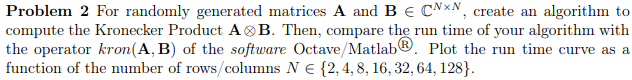

In [16]:
def kron_product(matrix_a, matrix_b):
    """
    Computes the Kronecker product of two matrices, matrix_a and matrix_b.

    Parameters:
    matrix_a (list of list of int/float): A 2D list (matrix) with dimensions (m x n).
    matrix_b (list of list of int/float): A 2D list (matrix) with dimensions (p x q).

    Returns:
    list of list of int/float: The resulting matrix from the Kronecker product of matrix_a and matrix_b with dimensions (mp x nq).

    Raises:
    ValueError: If any matrix has rows of inconsistent lengths.

    Example:
    matrix_a = [[1, 2], [3, 4]]
    matrix_b = [[5, 6], [7, 8]]
    result = kronecker_product(matrix_a, matrix_b)
    print(result)
    """
    
    # Validate matrix_a
    length_a = len(matrix_a[0])
    for row in matrix_a:
        if len(row) != length_a:
            raise ValueError("Matrix A has inconsistent row lengths.")
    
    # Validate matrix_b
    length_b = len(matrix_b[0])
    for row in matrix_b:
        if len(row) != length_b:
            raise ValueError("Matrix B has inconsistent row lengths.")
    
    # Get shape of matrix A (m x n) and matrix B (p x q)
    rows_a, cols_a = len(matrix_a), len(matrix_a[0])
    rows_b, cols_b = len(matrix_b), len(matrix_b[0])

    # Resulting matrix dimensions (mp x nq)
    results_matrix = [[None for _ in range(cols_a * cols_b)] for _ in range(rows_a * rows_b)]

    # Perform the Kronecker product
    for i in range(rows_a):
        for j in range(cols_a):
            # Multiply current element of matrix_a with all elements of matrix_b
            submatrix = [[element * matrix_a[i][j] for element in row] for row in matrix_b]

            # Calculate placement offsets
            row_offset = i * rows_b
            col_offset = j * cols_b

            # Place the submatrix in the result matrix
            for m in range(rows_b):
                for n in range(cols_b):
                    results_matrix[row_offset + m][col_offset + n] = submatrix[m][n]
    
    return results_matrix

In [20]:
# N values to test different matrix sizes
N_values = [2, 4, 8, 16, 32, 64, 128]
runtime_kron_manual = []
runtime_kron_numpy = []

for N in N_values:
    # Step 1: Create a random matrix with NumPy
    matrix_a = np.random.randint(1, 10, size=(N, N))
    matrix_b = np.random.randint(1, 10, size=(N, N))

    # Convert NumPy arrays to nested lists for the manual Kronecker product
    matrix_a_list = matrix_a.tolist()
    matrix_b_list = matrix_b.tolist()

    # Start the timer for manual Kronecker product
    start_time = time.time()

    # Compute the Kronecker product using the manual function
    C_manual = kron_product(matrix_a_list, matrix_b_list)

    # End the timer for manual Kronecker product
    end_time = time.time()
    runtime_manual = end_time - start_time
    runtime_kron_manual.append(runtime_manual)

    # Start the timer for NumPy Kronecker product
    start_time = time.time()

    # Compute the Kronecker product using NumPy
    C_numpy = np.kron(matrix_a, matrix_b)

    # End the timer for NumPy Kronecker product
    end_time = time.time()
    runtime_numpy = end_time - start_time
    runtime_kron_numpy.append(runtime_numpy)

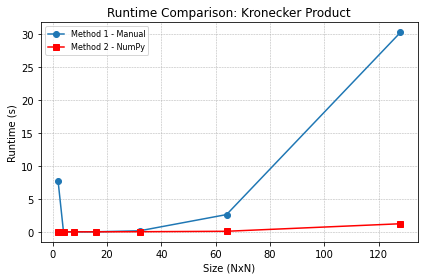

In [21]:
import matplotlib.pyplot as plt

# Plotting the runtimes
plt.plot(N_values, runtime_kron_manual, label="Method 1 - Manual", marker="o")
plt.plot(N_values, runtime_kron_numpy, label="Method 2 - NumPy", marker="s", color='red')

# Adding labels and legend
plt.xlabel("Size (NxN)", fontsize=10)
plt.ylabel("Runtime (s)", fontsize=10)
plt.title("Runtime Comparison: Kronecker Product", fontsize=12)
plt.legend(fontsize=8)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

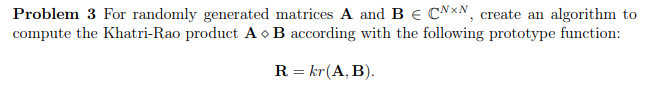

In [22]:
def kr_product(matrix_a, matrix_b):
    """
    Computes the Khatri-Rao product (column-wise Kronecker product) of two matrices, matrix_a and matrix_b.

    Parameters:
    matrix_a (list of list of int/float): A 2D list (matrix) with dimensions (m x n).
    matrix_b (list of list of int/float): A 2D list (matrix) with dimensions (p x n).

    Returns:
    list of list of int/float: The resulting matrix from the Khatri-Rao product of matrix_a and matrix_b with dimensions (mp x n).

    Raises:
    ValueError: If the number of columns in matrix_a and matrix_b do not match.

    Example:
    matrix_a = [[1, 2], [3, 4]]
    matrix_b = [[5, 6], [7, 8]]
    result = khatri_rao_product(matrix_a, matrix_b)
    print(result)
    """
    
    # Validate matrix_a and matrix_b
    cols_a = len(matrix_a[0])
    cols_b = len(matrix_b[0])
    
    if cols_a != cols_b:
        raise ValueError("Matrix A and Matrix B must have the same number of columns.")
    
    # Get the number of rows for both matrices
    rows_a = len(matrix_a)
    rows_b = len(matrix_b)

    # Resulting matrix dimensions (mp x n)
    results_matrix = []
    
    # Perform the Khatri-Rao product column by column
    for j in range(cols_a):
        # Extract the j-th column of A and B
        col_a = [matrix_a[i][j] for i in range(rows_a)]
        col_b = [matrix_b[i][j] for i in range(rows_b)]
        
        # Perform the Kronecker product of the two columns
        column_result = [a * b for a in col_a for b in col_b]
        
        # Append the result to the result matrix
        results_matrix.append(column_result)
    
    # Transpose the results matrix to match the final shape (mp x n)
    final_result = [list(col) for col in zip(*results_matrix)]
    
    return final_result

In [27]:
# N values to test different matrix sizes
N_values = [2, 4, 8, 16, 32, 64, 128]
runtime_kr_manual = []
runtime_kr_numpy = []

for N in N_values:
    # Step 1: Create random matrices with NumPy
    matrix_a = np.random.randint(1, 10, size=(N, N))
    matrix_b = np.random.randint(1, 10, size=(N, N))

    # Convert NumPy arrays to nested lists for the manual Khatri-Rao product
    matrix_a_list = matrix_a.tolist()
    matrix_b_list = matrix_b.tolist()

    # Start the timer for manual Khatri-Rao product
    start_time = time.time()

    # Compute the Khatri-Rao product using the manual function
    C_manual = kr_product(matrix_a_list, matrix_b_list)

    # End the timer for manual Khatri-Rao product
    end_time = time.time()
    runtime_manual = end_time - start_time
    runtime_kr_manual.append(runtime_manual)

    # Start the timer for NumPy Khatri-Rao product
    start_time = time.time()

    # Compute the Khatri-Rao product using NumPy
    C_numpy = np.multiply(matrix_a, matrix_b)

    # End the timer for NumPy Khatri-Rao product
    end_time = time.time()
    runtime_numpy = end_time - start_time
    runtime_kr_numpy.append(runtime_numpy)

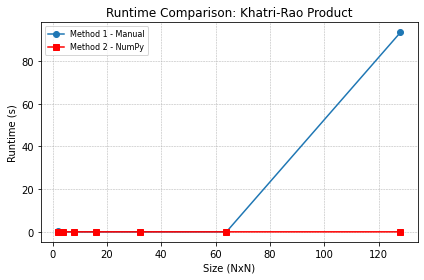

In [28]:
import matplotlib.pyplot as plt

# Plotting the runtimes
plt.plot(N_values, runtime_kr_manual, label="Method 1 - Manual", marker="o")
plt.plot(N_values, runtime_kr_numpy, label="Method 2 - NumPy", marker="s", color='red')

# Adding labels and legend
plt.xlabel("Size (NxN)", fontsize=10)
plt.ylabel("Runtime (s)", fontsize=10)
plt.title("Runtime Comparison: Khatri-Rao Product", fontsize=12)
plt.legend(fontsize=8)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()